# Penjelasan Singkat Tentang Final Project

**Author : Cindy Veronica R - Agustus 2022**

Pada tugas ini diminta untuk memastikan kira-kira calon klien akan mengalami kredit lancar (Target = 0) atau kredit macet (Target = 1) berdasarkan file data test.
Data yang digunakan ada data train yang berisi data para klien yang pernah melakukan peminjaman dan sudah dikategorikan dalam kategori klien yang mampu melakukan pelunasan atau tidak. Data train akan digunakan untuk menggali informasi yang menarik dan penentuan model terbaik yang akan digunakan untuk penentuan kelompok calon klien.

Tahapan yang dilakukan pada project ini adalah:


1. Mengimpor modul dan data yang akan digunakan
2. Melakukan eksplorasi data, visualisasi data, dan mendapatkan insight dari data
3. Melakukan data cleaning
4. Membentuk model dan melakukan evaluasi model (regresi logistik dan decision tree dengan tiga jenis resampling)
5. Melakukan prediksi berdasarkan data test
6. Mengambil kesimpulan dan saran

Model pilihan yang digunakan pada tugas ini didasarkan pada penelitian oleh Wahyuningsih dan Utari (2018) yang menyatakan bahwa model Decision Tree lebih unggul dari pada model KNN dan Naive Bayes.

Referensi:
Wahyunigsih, Sri dan Utari, Dyah R. 2018. Perbandingan Metode K-Nearest Neighbor, Naïve Bayes danDecision Tree untuk Prediksi Kelayakan Pemberian Kredit. *Konferensi Nasional Sistem Informasi 2018*. Diakses dari http://jurnal.atmaluhur.ac.id/index.php/knsi2018/article/view/424/349

# Modul dan Impor Data

In [2]:
# Modul yang Digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn import over_sampling, under_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from itertools import product

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Impor Data
Data_Train = pd.read_csv('/content/drive/MyDrive/Home Credit/application_train.csv')
Data_Test = pd.read_csv('/content/drive/MyDrive/Home Credit/application_test.csv')

In [4]:
# Cek Kesediaan Data
print(tabulate(Data_Train.head(10), headers = 'keys', tablefmt = 'fancy_grid'))
print("Data Train terdiri dari %d klien dan %d atribut" %Data_Train.shape)
print(tabulate(Data_Test.head(10), headers = 'keys', tablefmt = 'fancy_grid'))
print("Data Test terdiri dari %d klien dan %d atribut" %Data_Test.shape)

# Cadangan Data Train Asli
Data_Train_Cadangan = Data_Train

╒════╤══════════════╤══════════╤══════════════════════╤═══════════════╤════════════════╤═══════════════════╤════════════════╤════════════════════╤══════════════════╤═══════════════╤═══════════════════╤═══════════════════╤══════════════════════╤═══════════════════════════════╤══════════════════════╤═════════════════════╤══════════════════════════════╤══════════════╤═════════════════╤═════════════════════╤═══════════════════╤═══════════════╤══════════════╤══════════════════╤═══════════════════╤════════════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════════╤═══════════════════════════╤══════════════════════════════╤══════════════════════════════╤═══════════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════╤════════════════════════╤════════════════╤════════════════╤════════════════╤══════════════════╤════════════════════╤════

In [5]:
# Cek Tipe Data Setiap atribut
print(Data_Train.info(verbose = True, show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# Eksplorasi dan Visualisasi Data

Membandingkan klien yang mampu melakukan pembayaran dengan klien yang gagal melakukan pembayaran.

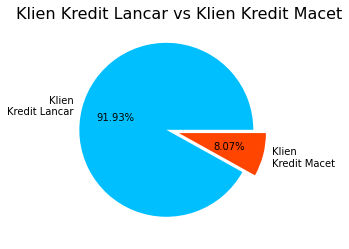

Jumlah Resiko Kredit
╒════╤══════════╤══════════════╕
│    │   TARGET │   AMT_CREDIT │
╞════╪══════════╪══════════════╡
│  0 │        0 │  1.7036e+11  │
├────┼──────────┼──────────────┤
│  1 │        1 │  1.38469e+10 │
╘════╧══════════╧══════════════╛


In [6]:
# Diagram Pie
plt.pie([str(len(Data_Train[Data_Train['TARGET'] == 0])), str(len(Data_Train[Data_Train['TARGET'] == 1]))],
        labels = ['Klien\nKredit Lancar', 'Klien\nKredit Macet'],
        autopct = '%.2f%%',
        explode = [0.15, 0],
        colors = ['deepskyblue', 'orangered'])
plt.title('Klien Kredit Lancar vs Klien Kredit Macet', fontsize = 16)
plt.show()

# Jumlah Resiko Kredit
resiko = Data_Train.groupby('TARGET')['AMT_CREDIT'].sum().reset_index()
resiko['AMT_CREDIT'] = resiko['AMT_CREDIT'].apply(lambda x : str(x))
print('Jumlah Resiko Kredit')
print(tabulate(resiko, headers = 'keys', tablefmt = 'fancy_grid'))

Berdasarkan data train terdapat 91,93% klien mampu melakukan pembayaran sedangkan 8,07% klien tidak mampu melakukan pembayaran. Selain itu, kemungkinan terburuk perusahaan harus menyediakan dana setidaknya 1,385 miliar untuk menanggulangi klien yang gagal melakukan pembayaran.

Pendefinisian fungsi yang digunakan berulang-ulang

---



In [7]:
# Fungsi Plot
def plt_kel(data, k1, k2, ID): 
    dfns = Data_Train.groupby([k1, k2])[ID].count().reset_index().rename({ID: 'Banyaknya ' + ID.upper()}, axis = 1)
    if k1 == 'TARGET':
          dfns['TARGET'] = ['Kredit Macet' if x == 1 else 'Kredit Lancar' for x in dfns['TARGET']]
    plot = sns.barplot(data = dfns, x = k2, y = 'Banyaknya ' + ID.upper(), hue = k1, palette = 'deep')
    plot.set_title('Grafik Perbandingan %s dan %s' %(k1.upper(), k2.upper()))
    plot.set_ylabel('Banyaknya Klien')
        
    if len(dfns) > 6:
        plt.xticks(rotation = 35)
    plt.show()

# Fungsi Tabulasi
def tabulasi(data, k1, k2, ID):
    print('Proporsi Banyaknya Klien Berdasarkan %s dan %s' %(k1.upper(), k2.upper()))
    
    dfns = Data_Train.groupby([k2, k1])[ID].count().reset_index().rename({ID: 'Banyaknya ' + ID.upper()}, axis = 1)
    dfns['Proporsi'] = dfns['Banyaknya ' + ID.upper()]*100 / len(data)
    dfns['Proporsi Relatif'] = dfns['Proporsi'].copy()
    for i in range(len(dfns)):
        dfns['Proporsi Relatif'][i] = dfns['Proporsi'][i] / sum(dfns[dfns[k2] == dfns[k2][i]]['Proporsi'])
    dfns['Proporsi'] = dfns['Proporsi'].apply(lambda x : str(round(x,2)) + '%')
    dfns['Proporsi Relatif'] = dfns['Proporsi Relatif'].apply(lambda x : str(round(x*100,2))+'%')
    
    if k1 == 'TARGET':
       dfns['TARGET'] = ['Kredit Macet' if x == 1 else 'Kredit Lancar' for x in dfns['TARGET']]
    
    dfns.sort_values(k2, ascending = True)
    print(tabulate(dfns, headers = 'keys', tablefmt = 'fancy_grid'))
    print()

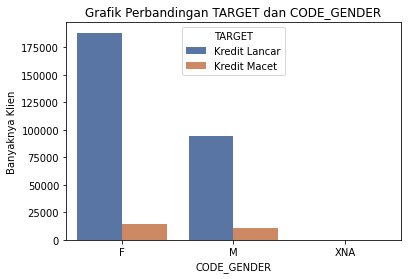

Proporsi Banyaknya Klien Berdasarkan TARGET dan CODE_GENDER
╒════╤═══════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ CODE_GENDER   │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪═══════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ F             │ Kredit Lancar │                 188278 │ 61.23%     │ 93.0%              │
├────┼───────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ F             │ Kredit Macet  │                  14170 │ 4.61%      │ 7.0%               │
├────┼───────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ M             │ Kredit Lancar │                  94404 │ 30.7%      │ 89.86%             │
├────┼───────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  3 │ M             │ Kredit Macet  │                  10

In [8]:
# Jenis Kelamin vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'CODE_GENDER', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'CODE_GENDER', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (65%) berjenis kelamin perempuan. hasil proporsi relatif menunjukkan bahwa klien pria memiliki peluang yang lebih besar mengalami kredit macet daripada klien perempuan.

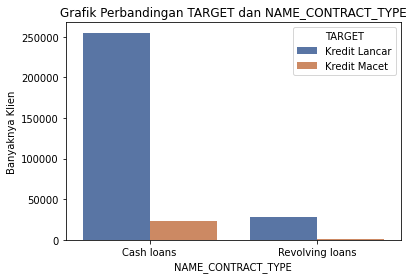

Proporsi Banyaknya Klien Berdasarkan TARGET dan NAME_CONTRACT_TYPE
╒════╤══════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ NAME_CONTRACT_TYPE   │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪══════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ Cash loans           │ Kredit Lancar │                 255011 │ 82.93%     │ 91.65%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ Cash loans           │ Kredit Macet  │                  23221 │ 7.55%      │ 8.35%              │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ Revolving loans      │ Kredit Lancar │                  27675 │ 9.0%       │ 94.52%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼──────────

In [9]:
# Jenis Tunjangan vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_CONTRACT_TYPE', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_CONTRACT_TYPE', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (90%) memiliki tipe kontrak cash loans. hasil proporsi relatif menunjukkan bahwa klien dengan tipe kontrak cash loans memiliki peluang yang lebih besar mengalami kredit macet daripada klien dengan tipe kontrak revolving loans.

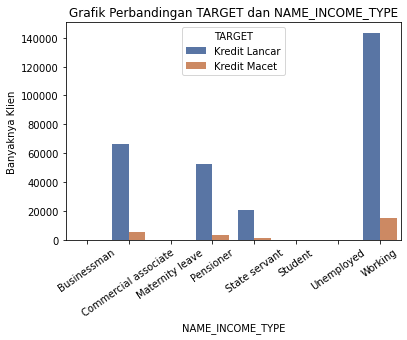

Proporsi Banyaknya Klien Berdasarkan TARGET dan NAME_INCOME_TYPE
╒════╤══════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ NAME_INCOME_TYPE     │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪══════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ Businessman          │ Kredit Lancar │                     10 │ 0.0%       │ 100.0%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ Commercial associate │ Kredit Lancar │                  66257 │ 21.55%     │ 92.52%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ Commercial associate │ Kredit Macet  │                   5360 │ 1.74%      │ 7.48%              │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────

In [10]:
# Jenis Pemasukan vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_INCOME_TYPE', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_INCOME_TYPE', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (51%) memiliki pendapatan tipe 'working'. hasil proporsi relatif menunjukkan bahwa klien dengan tipe pendapatan 'working' memiliki peluang yang lebih besar mengalami kredit macet daripada klien dengan tipe pendapatan yang lain. selain itu dapat dilihat bahwa tipe pendapatan 'businessman' dan 'student' 100% mengalami kredit lancar sehingga perlu dilakukan campaign untuk meningkatkan klien dari sektor tersebut.

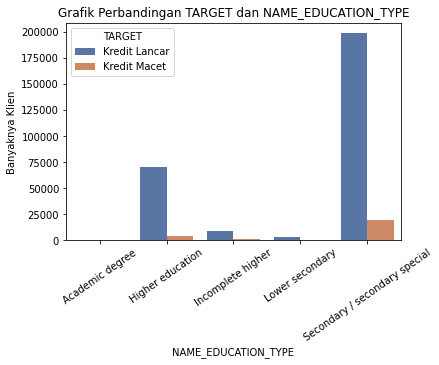

Proporsi Banyaknya Klien Berdasarkan TARGET dan NAME_EDUCATION_TYPE
╒════╤═══════════════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ NAME_EDUCATION_TYPE           │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪═══════════════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ Academic degree               │ Kredit Lancar │                    161 │ 0.05%      │ 98.17%             │
├────┼───────────────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ Academic degree               │ Kredit Macet  │                      3 │ 0.0%       │ 1.83%              │
├────┼───────────────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ Higher education              │ Kredit Lancar │                  70854 │ 23.04%     │ 94.64%             │
├────┼──────────────

In [11]:
# Pendidikan vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_EDUCATION_TYPE', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_EDUCATION_TYPE', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (71%) memiliki pendidikan 'secondary'. hasil proporsi relatif menunjukkan bahwa klien dengan pendidikan 'secondary' memiliki peluang yang lebih besar mengalami kredit macet daripada klien dengan pendidikan lainnya.

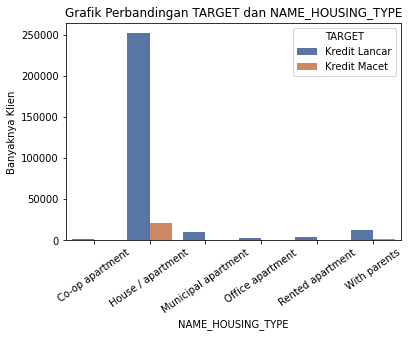

Proporsi Banyaknya Klien Berdasarkan TARGET dan NAME_HOUSING_TYPE
╒════╤═════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ NAME_HOUSING_TYPE   │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪═════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ Co-op apartment     │ Kredit Lancar │                   1033 │ 0.34%      │ 92.07%             │
├────┼─────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ Co-op apartment     │ Kredit Macet  │                     89 │ 0.03%      │ 7.93%              │
├────┼─────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ House / apartment   │ Kredit Lancar │                 251596 │ 81.82%     │ 92.2%              │
├────┼─────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────

In [12]:
# Kondisi Tempat Tinggal vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_HOUSING_TYPE', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_HOUSING_TYPE', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (65%) tinggal di 'house/apartment'. hasil proporsi relatif menunjukkan bahwa klien yang tinggal di 'rented apartment' dan 'with parent' memiliki peluang yang lebih dari 10% mengalami kredit macet.

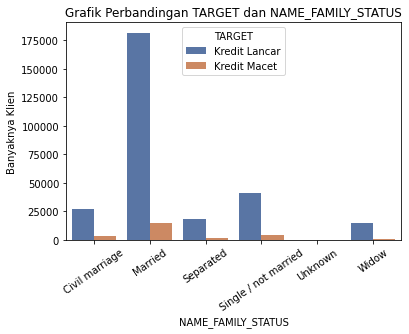

Proporsi Banyaknya Klien Berdasarkan TARGET dan NAME_FAMILY_STATUS
╒════╤══════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │ NAME_FAMILY_STATUS   │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪══════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │ Civil marriage       │ Kredit Lancar │                  26814 │ 8.72%      │ 90.06%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │ Civil marriage       │ Kredit Macet  │                   2961 │ 0.96%      │ 9.94%              │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │ Married              │ Kredit Lancar │                 181582 │ 59.05%     │ 92.44%             │
├────┼──────────────────────┼───────────────┼────────────────────────┼────────────┼──────────

In [13]:
# Status Keluarga vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_FAMILY_STATUS', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'NAME_FAMILY_STATUS', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (63%) adalah 'married'. hasil proporsi relatif menunjukkan bahwa klien 'civil marriage' memiliki peluang yang lebih besar mengalami kredit macet daripada klien dengan 'family status' yang lain.

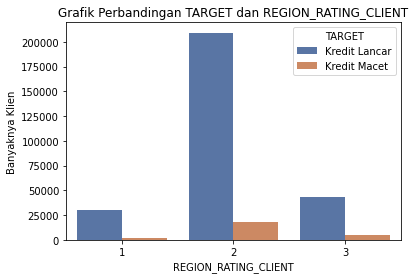

Proporsi Banyaknya Klien Berdasarkan TARGET dan REGION_RATING_CLIENT
╒════╤════════════════════════╤═══════════════╤════════════════════════╤════════════╤════════════════════╕
│    │   REGION_RATING_CLIENT │ TARGET        │   Banyaknya SK_ID_CURR │ Proporsi   │ Proporsi Relatif   │
╞════╪════════════════════════╪═══════════════╪════════════════════════╪════════════╪════════════════════╡
│  0 │                      1 │ Kredit Lancar │                  30645 │ 9.97%      │ 95.18%             │
├────┼────────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  1 │                      1 │ Kredit Macet  │                   1552 │ 0.5%       │ 4.82%              │
├────┼────────────────────────┼───────────────┼────────────────────────┼────────────┼────────────────────┤
│  2 │                      2 │ Kredit Lancar │                 209077 │ 67.99%     │ 92.11%             │
├────┼────────────────────────┼───────────────┼────────────────────────┼───

In [14]:
# Region Rating vs Target
plt_kel(data = Data_Train, k1 = 'TARGET', k2 = 'REGION_RATING_CLIENT', ID = 'SK_ID_CURR')
tabulasi(data = Data_Train, k1 = 'TARGET', k2 = 'REGION_RATING_CLIENT', ID = 'SK_ID_CURR')

Insight:

sebagian besar klien (73%) berasal dari 'region rating' 2. hasil proporsi relatif menunjukkan bahwa klien yang berasal dari 'region rating' 3 memiliki peluang yang lebih besar mengalami kredit macet daripada klien daerah yang lain.

# Data Cleaning
Data cleaning dilakukan untuk identifikasi kesalahan pada data yang selanjutnya dilakukan perbaikan ataupun penghapusan data yang tidak sesuai sehingga data siap untuk dilakukan pemodelan/analisis lanjutan. Selain itu pada tahap Data Cleaning dapat menghapus kolom (atribut) yang sekiranya tidak dibutuhkan atau yang dianggap tidak memiliki kontribusi

In [15]:
# Analisis Deskriptif
print(tabulate(Data_Train.describe(include = "all").transpose(), headers = 'keys', tablefmt = 'fancy_grid'))

╒══════════════════════════════╤═════════╤══════════╤═══════════════════════════════╤════════╤══════════════════╤═════════════════╤══════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│                              │   count │   unique │ top                           │   freq │             mean │             std │              min │           25% │           50% │           75% │           max │
╞══════════════════════════════╪═════════╪══════════╪═══════════════════════════════╪════════╪══════════════════╪═════════════════╪══════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ SK_ID_CURR                   │  307511 │      nan │ nan                           │    nan │ 278181           │ 102790          │ 100002           │ 189146        │ 278202        │ 367142        │ 456255        │
├──────────────────────────────┼─────────┼──────────┼───────────────────────────────┼────────┼──────────────────┼─────────────────┼─────────

Hasil analisis deskriptif dapat digunakan untuk menentukan atribut yang dapat dihapus atau perlu diperbaiki.

*   Atribut `'SK_ID_CURR'` dapat dihapus karena atribut tersebut merupakan id setiap klien sehingga tidak memiliki kontribusi dalam pemodelan
*   Atribut `'ORGANIZATION_TYPE'` dapat dihapus karena memiliki nilai unique yang besar
*   Atribut `'DAYS_BIRTH'`, `'DAYS_EMPLOYED'`, `'DAYS_REGISTRATION'`, `'DAYS_ID_PUBLISH'`, `'DAYS_LAST_PHONE_CHANGE'` memiliki nilai negatif -> perlu dilakukan pemutlakan nilai








In [16]:
# Menghapus Atribut yang Tidak diperlukan
Data_Train.drop(['ORGANIZATION_TYPE','SK_ID_CURR'], inplace = True, axis = 1)

In [17]:
# Tranformasi data bernilai positif untuk atribut: 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE' 
negatif = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
for i in negatif:
    Data_Train[i] = abs(Data_Train[i])

# Periksa hasil transformasi
for i in negatif:
    a = any(Data_Train[i] < 0)
    if a == True:
       print('Terdapat nilai negatif pada kolom %s' %i)
    else:
       print('Nilai negatif pada kolom %s telah ditransformasi' %i)

Nilai negatif pada kolom DAYS_BIRTH telah ditransformasi
Nilai negatif pada kolom DAYS_EMPLOYED telah ditransformasi
Nilai negatif pada kolom DAYS_REGISTRATION telah ditransformasi
Nilai negatif pada kolom DAYS_ID_PUBLISH telah ditransformasi
Nilai negatif pada kolom DAYS_LAST_PHONE_CHANGE telah ditransformasi


In [18]:
# Periksa Duplikasi Baris
Data_Train.duplicated(subset = None).sum()

# Penanganan Duplikasi Baris
# Data_Train.drop_duplicates()

0

Hasil pemeriksaan duplikasi baris menunjukkan bahwa tidak terdapat baris yang memiliki nilai yang sama pada setiap atribut sehingga tidak perlu dilakukan penanganan duplikasi baris

Penanganan missing value perlu dilakukan karena proses analisis tidak bisa berjalan apabila terdapat nilai yang kosong. Apabila terdapat >45% nilai pada setiap atribut kosong maka aktribut tersebut dapat dihapus. Jika terdapat <45% nilai kosongm maka dapat dilakukan pergantian nilai dengan ketentuan:
1. Untuk atribut yang tergolong Numerik (int, float64) dapat diganti menggunakan nilai median.
2. Untuk atribut yang tergolong Kategorik (object) dapat diganti menggunakan nilai modus.

In [19]:
# Cek persentase missing value
for column in Data_Train.columns:
  n_col = len(Data_Train[column])
  nilai_kosong = Data_Train[column].isna().sum()
  persentase_nilai_kosong = nilai_kosong*100/n_col
  print('Persentase Missing Value kolom ' + str(column) + ' sebesar ' + str(format(persentase_nilai_kosong, ".2f") + '%'))

Persentase Missing Value kolom TARGET sebesar 0.00%
Persentase Missing Value kolom NAME_CONTRACT_TYPE sebesar 0.00%
Persentase Missing Value kolom CODE_GENDER sebesar 0.00%
Persentase Missing Value kolom FLAG_OWN_CAR sebesar 0.00%
Persentase Missing Value kolom FLAG_OWN_REALTY sebesar 0.00%
Persentase Missing Value kolom CNT_CHILDREN sebesar 0.00%
Persentase Missing Value kolom AMT_INCOME_TOTAL sebesar 0.00%
Persentase Missing Value kolom AMT_CREDIT sebesar 0.00%
Persentase Missing Value kolom AMT_ANNUITY sebesar 0.00%
Persentase Missing Value kolom AMT_GOODS_PRICE sebesar 0.09%
Persentase Missing Value kolom NAME_TYPE_SUITE sebesar 0.42%
Persentase Missing Value kolom NAME_INCOME_TYPE sebesar 0.00%
Persentase Missing Value kolom NAME_EDUCATION_TYPE sebesar 0.00%
Persentase Missing Value kolom NAME_FAMILY_STATUS sebesar 0.00%
Persentase Missing Value kolom NAME_HOUSING_TYPE sebesar 0.00%
Persentase Missing Value kolom REGION_POPULATION_RELATIVE sebesar 0.00%
Persentase Missing Value ko

In [20]:
# Pengelompokan atribut menjadi Kategotik dan Numerik
numerik_var = []
kategorik_var = []

for i in Data_Train.columns:
  if Data_Train[i].dtype == 'object':
    kategorik_var.append(i)
  else:
    numerik_var.append(i)

**Penanganan kelompok Numerik**

---



In [21]:
for column in numerik_var:
  n_col = len(Data_Train[column])
  nilai_num_kosong = Data_Train[column].isna().sum()/n_col
  if nilai_num_kosong > 0.45:
    Data_Train.drop(column, axis = 1, inplace = True)
    numerik_var.remove(column)
  else:
    Data_Train[column].fillna(Data_Train[column].median(), inplace = True)

**Penanganan kelompok kategorik**

---



In [22]:
for column in kategorik_var:
  n_col = len(Data_Train[column])
  nilai_kat_kosong = Data_Train[column].isna().sum()/n_col
  if nilai_kat_kosong > 0.45:
     Data_Train.drop(column, axis = 1, inplace = True)
     kategorik_var.remove(column)
  else:
     Data_Train[column].fillna(Data_Train[column].mode()[0], inplace = True)

In [23]:
# Mengganti NAN dengan Na
for column in Data_Train.columns:
  n_col = len(Data_Train[column])
  nilai_kosong = Data_Train[column].isna().sum()
  persentase_nilai_kosong = nilai_kosong*100/n_col
  if persentase_nilai_kosong > 45:
    Data_Train.drop(column, axis = 1, inplace = True)
Data_Train = Data_Train.fillna(Data_Train.median())

In [24]:
# Cek persentase missing value setelah penanganan
for column in Data_Train.columns:
  n_col = len(Data_Train[column])
  nilai_kosong = Data_Train[column].isna().sum()
  persentase_nilai_kosong = nilai_kosong*100/n_col
  print('Persentase Missing Value kolom ' + str(column) + ' sebesar ' + str(format(persentase_nilai_kosong, ".2f") + '%'))
print(Data_Train.shape)

Persentase Missing Value kolom TARGET sebesar 0.00%
Persentase Missing Value kolom NAME_CONTRACT_TYPE sebesar 0.00%
Persentase Missing Value kolom CODE_GENDER sebesar 0.00%
Persentase Missing Value kolom FLAG_OWN_CAR sebesar 0.00%
Persentase Missing Value kolom FLAG_OWN_REALTY sebesar 0.00%
Persentase Missing Value kolom CNT_CHILDREN sebesar 0.00%
Persentase Missing Value kolom AMT_INCOME_TOTAL sebesar 0.00%
Persentase Missing Value kolom AMT_CREDIT sebesar 0.00%
Persentase Missing Value kolom AMT_ANNUITY sebesar 0.00%
Persentase Missing Value kolom AMT_GOODS_PRICE sebesar 0.00%
Persentase Missing Value kolom NAME_TYPE_SUITE sebesar 0.00%
Persentase Missing Value kolom NAME_INCOME_TYPE sebesar 0.00%
Persentase Missing Value kolom NAME_EDUCATION_TYPE sebesar 0.00%
Persentase Missing Value kolom NAME_FAMILY_STATUS sebesar 0.00%
Persentase Missing Value kolom NAME_HOUSING_TYPE sebesar 0.00%
Persentase Missing Value kolom REGION_POPULATION_RELATIVE sebesar 0.00%
Persentase Missing Value ko

Seluruh atribut yang memiliki missing value telah ditangani.
Tidak dilakukan penanganan outlier karena semua data yang ada dianggap memiliki informasi yang berguna

# Pembentukan Model

In [25]:
# Pengelompokan atribut menjadi Kategorik dan Numerik lagi
numerik_var = []
kategorik_var = []

for i in Data_Train.columns:
  if Data_Train[i].dtype == 'object':
     kategorik_var.append(i)
  else:
     numerik_var.append(i)

In [26]:
# Transformasi kode kategorik
Data_Train[kategorik_var] = Data_Train[kategorik_var].apply(preprocessing.LabelEncoder().fit_transform)

# Periksa data train setelah transformasi kode kategorik
print(tabulate(Data_Train.head(10), headers = 'keys', tablefmt = 'fancy_grid'))
print("Data Train terdiri dari %d klien dan %d atribut" %Data_Train.shape)

╒════╤══════════╤══════════════════════╤═══════════════╤════════════════╤═══════════════════╤════════════════╤════════════════════╤══════════════════╤═══════════════╤═══════════════════╤═══════════════════╤════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════╤══════════════════════════════╤══════════════╤═════════════════╤═════════════════════╤═══════════════════╤══════════════╤══════════════════╤═══════════════════╤════════════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════════╤═══════════════════════════╤══════════════════════════════╤══════════════════════════════╤═══════════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════╤════════════════╤════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════

In [27]:
# Pemilihan atribut X dan Y
X = Data_Train.drop('TARGET', axis = 1)
Y = Data_Train['TARGET']

In [28]:
# Resampling Data (Over Sampling dan Under Sampling)
undr = RandomUnderSampler(sampling_strategy = 1)
X_undr, Y_undr = undr.fit_resample(X, Y)

ovr = RandomOverSampler(sampling_strategy = 1)
X_ovr, Y_ovr = ovr.fit_resample(X, Y)

In [29]:
# Pembagian data untuk Train dan evaluasi (menggunakan data train) -> Tanpa Resampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Ukuran masing-masing data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(246008, 70)
(61503, 70)
(246008,)
(61503,)


In [30]:
# Pembagian data untuk Train dan Test (menggunakan data train) -> Under Sampling
X_train_undr, X_test_undr, Y_train_undr, Y_test_undr = train_test_split(X_undr, Y_undr, test_size = 0.2, random_state = 1)

# Ukuran masing-masing data
print(X_train_undr.shape)
print(X_test_undr.shape)
print(Y_train_undr.shape)
print(Y_test_undr.shape)

(39720, 70)
(9930, 70)
(39720,)
(9930,)


In [32]:
# Pembagian data untuk Train dan Test (menggunakan data train) -> Over Sampling
X_train_ovr, X_test_ovr, Y_train_ovr, Y_test_ovr = train_test_split(X_ovr, Y_ovr ,test_size = 0.2, random_state = 1)

# Ukuran masing-masing data
print(X_train_ovr.shape)
print(X_test_ovr.shape)
print(Y_train_ovr.shape)
print(Y_test_ovr.shape)

(452297, 70)
(113075, 70)
(452297,)
(113075,)


**Uji Coba Model**

---

Pemodelan yang digunakan adalah Regresi Logistik dan Decision Tree dengan tiga metode resampling (tanpa resampling, Over Sampling, dan unde resampling)



In [33]:
# Fungsi untuk validasi model
def nilai_eval(Y_train, Y_test, Y_pred_train, Y_pred_test):
    print("Nilai Akurasi (Train): ", accuracy_score(Y_train, Y_pred_train))
    print("Nilai Akurasi (Test): ", accuracy_score(Y_test, Y_pred_test))
    print("Nilai F1 (Train): ", f1_score(Y_train, Y_pred_train))
    print("Nilai F1 (Test): ", f1_score(Y_test, Y_pred_test))
    nilai_akurasi_test = accuracy_score(Y_test, Y_pred_test)
    nilai_F1_test = f1_score(Y_test, Y_pred_test)
    return [nilai_akurasi_test, nilai_F1_test]

def conf_mat(Y_pred_train, Y_akt_train, Y_pred_test, Y_akt_test):
    conf_mat_train = confusion_matrix(Y_akt_train, Y_pred_train)
    conf_mat_test = confusion_matrix(Y_akt_test, Y_pred_test)
    cm_pict_train = ConfusionMatrixDisplay(confusion_matrix = conf_mat_train, display_labels = ['Kredit Macet', 'Kredit Lancar'])
    cm_pict_train.plot()
    plt.title('Confusion Matrix (Train)')
    plt.show()
    cm_pict_test = ConfusionMatrixDisplay(confusion_matrix = conf_mat_test, display_labels = ['Kredit Macet', 'Kredit Lancar'])
    cm_pict_test.plot()
    plt.title('Confusion Matrix (Test)')
    plt.show()

1. Regresi Logistik

---



Nilai Akurasi (Train):  0.919283112744301
Nilai Akurasi (Test):  0.9191746744061265
Nilai F1 (Train):  0.0
Nilai F1 (Test):  0.0



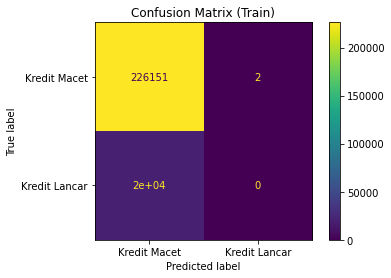

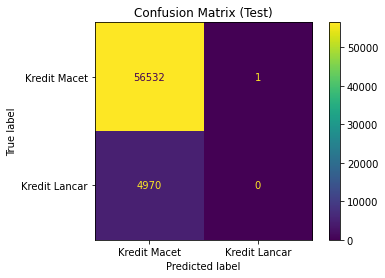

In [34]:
# Tanpa Resampling
# Model
LR = LogisticRegression()
LR = LR.fit(X_train, Y_train)

# Prediksi
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

# Evaluasi
LR_eval = nilai_eval(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
conf_mat(Y_pred_train, Y_train, Y_pred_test, Y_test)

Nilai Akurasi (Train):  0.579380664652568
Nilai Akurasi (Test):  0.5712990936555892
Nilai F1 (Train):  0.5706796864962096
Nilai F1 (Test):  0.5545673328450351



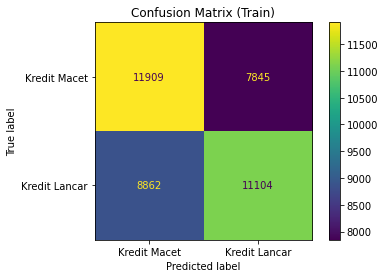

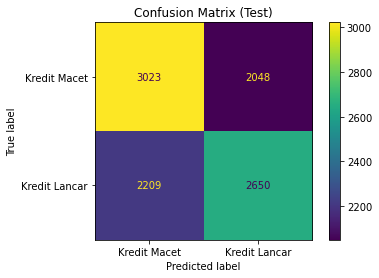

In [35]:
# Under Sampling
# Model
LR_undr = LogisticRegression()
LR_undr = LR_undr.fit(X_train_undr, Y_train_undr)

# Prediksi
Y_pred_train_undr = LR_undr.predict(X_train_undr)
Y_pred_test_undr = LR_undr.predict(X_test_undr)

# Evaluasi
LR_eval_undr = nilai_eval(Y_train_undr, Y_test_undr, Y_pred_train_undr, Y_pred_test_undr)
print()
conf_mat(Y_pred_train_undr, Y_train_undr, Y_pred_test_undr, Y_test_undr)

Nilai Akurasi (Train):  0.5769903404179112
Nilai Akurasi (Test):  0.5775989387574618
Nilai F1 (Train):  0.5618000174065201
Nilai F1 (Test):  0.5602460110668153



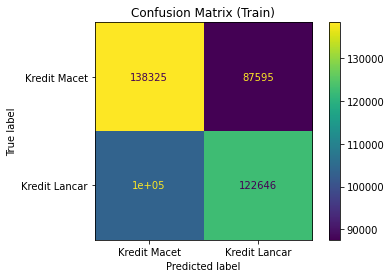

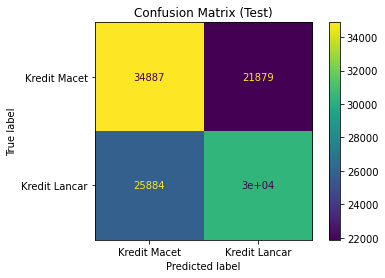

In [36]:
# Over Sampling
# Model
LR_ovr = LogisticRegression()
LR_ovr = LR_ovr.fit(X_train_ovr, Y_train_ovr)

# Prediksi
Y_pred_train_ovr = LR_ovr.predict(X_train_ovr)
Y_pred_test_ovr = LR_ovr.predict(X_test_ovr)

# Evaluasi
LR_eval_ovr = nilai_eval(Y_train_ovr, Y_test_ovr, Y_pred_train_ovr, Y_pred_test_ovr)
print()
conf_mat(Y_pred_train_ovr, Y_train_ovr, Y_pred_test_ovr, Y_test_ovr)

2. Decision Tree

---



Nilai Akurasi (Train):  1.0
Nilai Akurasi (Test):  0.8503812822138758
Nilai F1 (Train):  1.0
Nilai F1 (Test):  0.15701722242579702



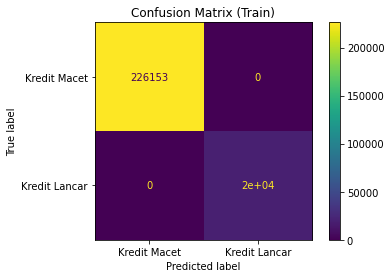

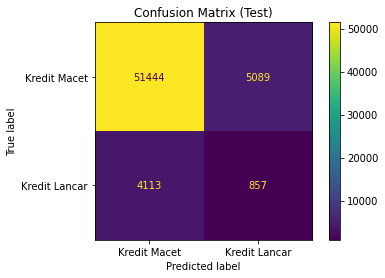

In [37]:
# Tanpa Resampling
# Model
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

# Prediksi
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

# Evaluasi
DT_eval = nilai_eval(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
conf_mat(Y_pred_train, Y_train, Y_pred_test, Y_test)

Nilai Akurasi (Train):  1.0
Nilai Akurasi (Test):  0.584994964753273
Nilai F1 (Train):  1.0
Nilai F1 (Test):  0.5845347313237221



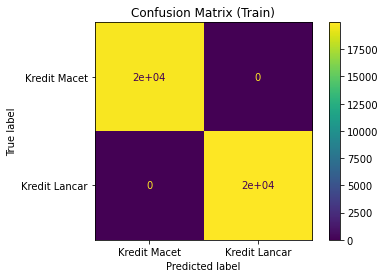

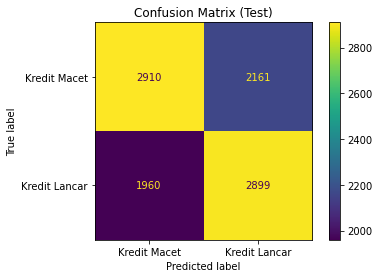

In [38]:
# Under Sampling
# Model
DT_undr = DecisionTreeClassifier()
DT_undr = DT_undr.fit(X_train_undr, Y_train_undr)

# Prediksi
Y_pred_train_undr = DT_undr.predict(X_train_undr)
Y_pred_test_undr = DT_undr.predict(X_test_undr)

# Evaluasi
DT_eval_undr = nilai_eval(Y_train_undr, Y_test_undr, Y_pred_train_undr, Y_pred_test_undr)
print()
conf_mat(Y_pred_train_undr, Y_train_undr, Y_pred_test_undr, Y_test_undr)

Nilai Akurasi (Train):  1.0
Nilai Akurasi (Test):  0.9512182179969048
Nilai F1 (Train):  1.0
Nilai F1 (Test):  0.9533072612457041



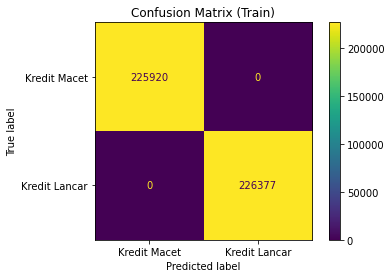

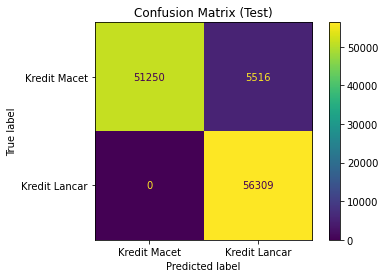

In [39]:
# Over Sampling
# Model
DT_ovr = DecisionTreeClassifier()
DT_ovr = DT_ovr.fit(X_train_ovr, Y_train_ovr)

# Prediksi
Y_pred_train_ovr = DT_ovr.predict(X_train_ovr)
Y_pred_test_ovr = DT_ovr.predict(X_test_ovr)

# Evaluasi
DT_eval_ovr = nilai_eval(Y_train_ovr, Y_test_ovr, Y_pred_train_ovr, Y_pred_test_ovr)
print()
conf_mat(Y_pred_train_ovr, Y_train_ovr, Y_pred_test_ovr, Y_test_ovr)

**Pemilihan Model Terbaik**

---



In [40]:
model = ['Regresi Logistik', 'Decision Tree']
resamp = ['Tanpa Resampling', 'Under Sampling', 'Over Sampling']
nilai_akurasi_test = [LR_eval[0], LR_eval_undr[0], LR_eval_ovr[0], DT_eval[0], DT_eval_undr[0], DT_eval_ovr[0]]
nilai_akurasi_test = [ '%.4f' %elem for elem in nilai_akurasi_test]
nilai_F1_test = [LR_eval[1], LR_eval_undr[1], LR_eval_ovr[1], DT_eval[1], DT_eval_undr[1], DT_eval_ovr[1]]
nilai_F1_test = [ '%.4f' %elem for elem in nilai_F1_test]

Perbandingan = pd.DataFrame(list(product(model, resamp)), columns = ['Model', 'Metode Resampling'])
Perbandingan['Nilai Akurasi'] = nilai_akurasi_test
Perbandingan['Nilai F1 '] = nilai_F1_test
Perbandingan

,Model,Metode Resampling,Nilai Akurasi,Nilai F1
0,Regresi Logistik,Tanpa Resampling,0.9192,0.0000
1,Regresi Logistik,Under Sampling,0.5713,0.5546
2,Regresi Logistik,Over Sampling,0.5776,0.5602
3,Decision Tree,Tanpa Resampling,0.8504,0.1570
4,Decision Tree,Under Sampling,0.5850,0.5845
5,Decision Tree,Over Sampling,0.9512,0.9533


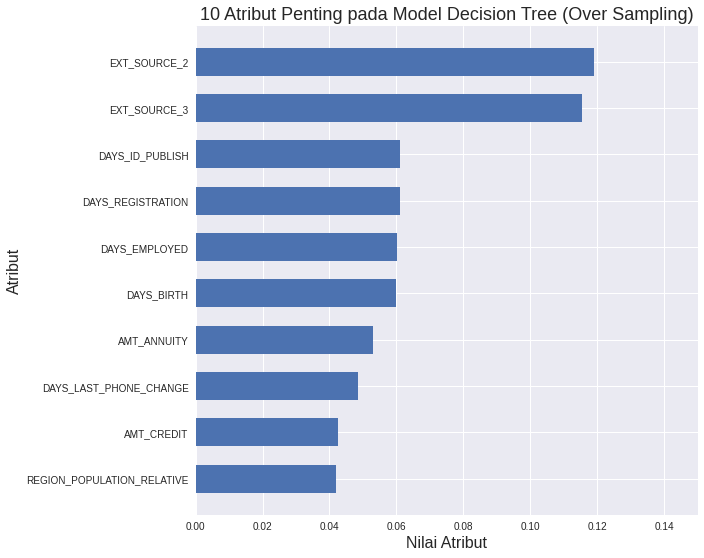

In [41]:
# Atribut yang paling penting
atr_urut = DT_ovr.feature_importances_.argsort()[-10:]
plt.style.use('seaborn')
plt.gcf().set_size_inches(9, 9)
plt.barh(X.columns[atr_urut], DT_ovr.feature_importances_[atr_urut], height = 0.6)
plt.xlim(0,0.15)
plt.title("10 Atribut Penting pada Model Decision Tree (Over Sampling)", fontsize = 18)
plt.xlabel("Nilai Atribut", fontsize = 16)
plt.ylabel('Atribut', fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Boxplot variabel penting: EXT_SOURCE_2')

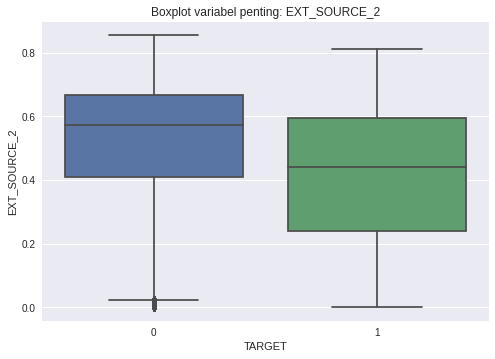

In [42]:
# Fitur paling penting : EXT_SOURCE_2
sns.boxplot(data = Data_Train_Cadangan, x = 'TARGET', y = 'EXT_SOURCE_2')
plt.title('Boxplot variabel penting: EXT_SOURCE_2')

Insight:

sebagian besar klien yang masuk dalam kategori kredit lancar (Target = 0) memiliki nilai 'EXT_SOURCE_2' yang lebih tinggi daripada klien dalam kategori kredit macet (Target = 1)

Text(0.5, 1.0, 'Boxplot variabel penting: EXT_SOURCE_3')

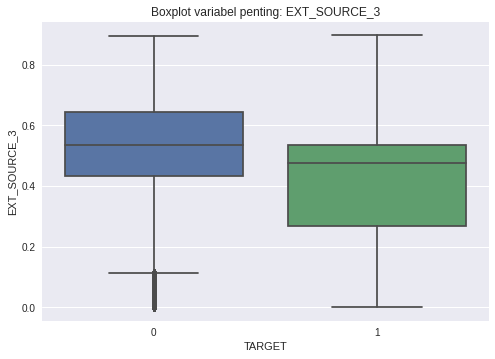

In [43]:
# Fitur paling penting : EXT_SOURCE_3
sns.boxplot(data = Data_Train_Cadangan, x = 'TARGET', y = 'EXT_SOURCE_3')
plt.title('Boxplot variabel penting: EXT_SOURCE_3')

Insight:

sebagian besar klien yang masuk dalam kategori kredit lancar (Target = 0) memiliki nilai 'EXT_SOURCE_2' yang lebih tinggi daripada klien dalam kategori kredit macet (Target = 1)

# Prediksi Klien Baru

Menangani missing value dan mereduksi atribut pada data test sehingga atribut yang digunakan sama dengan atribut pada pemodelan sebelumnya

In [44]:
# Proses Data Cleaning
# ID klien
ID_Klien = Data_Test['SK_ID_CURR']

# Menghapus atribut yang tidak digunakan
hapus = list(set(Data_Test.columns) - set(X.columns))
Data_Test.drop(hapus, inplace = True, axis = 1)

# Pengelompokan atribut
numerik_var = []
kategorik_var = []

for i in Data_Test.columns:
  if Data_Test[i].dtype == 'object':
     kategorik_var.append(i)
  else:
     numerik_var.append(i)

# Penanganan missing value Numerik
for column in numerik_var:
    Data_Test[column].fillna(Data_Test[column].median(), inplace = True)

# Penanganan missing value Kategorik
for column in kategorik_var:
    Data_Test[column].fillna(Data_Test[column].mode()[0], inplace = True)

# Mengganti NAN dengan Na
for column in Data_Test.columns:
    Data_Test = Data_Test.fillna(Data_Test.median())

# Periksa missing value setelah tranformasi
Data_Test.isna().sum().sum()

# Transformasi kode kategorik
Data_Test[kategorik_var] = Data_Test[kategorik_var].apply(preprocessing.LabelEncoder().fit_transform)

print(tabulate(Data_Test.head(10), headers = 'keys', tablefmt = 'fancy_grid'))
print("Data Test terdiri dari %d klien dan %d atribut" %Data_Test.shape)

╒════╤══════════════════════╤═══════════════╤════════════════╤═══════════════════╤════════════════╤════════════════════╤════════════════╤═══════════════╤═══════════════════╤═══════════════════╤════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════╤══════════════════════════════╤══════════════╤═════════════════╤═════════════════════╤═══════════════════╤══════════════╤══════════════════╤═══════════════════╤════════════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════════╤═══════════════════════════╤══════════════════════════════╤══════════════════════════════╤═══════════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════╤════════════════╤════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════

Melakukan prediksi menggunakan model Decision Tree dengan over sampling

---



In [45]:
Prediksi = DT_ovr.predict(Data_Test)
Prediksi = [int(x) for x in list(Prediksi)]

# Menggabungkan data test, ID Klien, dan hasil prediksi
Data_Test['TARGET'] = Prediksi
Data_Test['SK_ID_CURR'] = ID_Klien
print(tabulate(Data_Test.head(10), headers = 'keys', tablefmt = 'fancy_grid'))

# Banyaknya klien berdasarkan sukses (Target = 0) atau tidak (Target = 1) melakukan pembayaran
Data_Test.groupby('TARGET')['SK_ID_CURR'].count()

╒════╤══════════════════════╤═══════════════╤════════════════╤═══════════════════╤════════════════╤════════════════════╤════════════════╤═══════════════╤═══════════════════╤═══════════════════╤════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════╤══════════════════════════════╤══════════════╤═════════════════╤═════════════════════╤═══════════════════╤══════════════╤══════════════════╤═══════════════════╤════════════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════════╤═══════════════════════════╤══════════════════════════════╤══════════════════════════════╤═══════════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════╤════════════════╤════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════

TARGET
0    42845
1     5899
Name: SK_ID_CURR, dtype: int64

Hasil prediksi menunjukkan bahwa terdapat 5899 klien yang termasuk dalam kategori kredit macet

In [46]:
# Jumlah Kredit Resiko
resiko = Data_Test.groupby('TARGET')['AMT_CREDIT'].sum().reset_index()
resiko['AMT_CREDIT'] = resiko['AMT_CREDIT'].apply(lambda x : str(x))
print('Jumlah Kredit Resiko')
print(tabulate(resiko, headers = 'keys', tablefmt = 'fancy_grid'))

Jumlah Kredit Resiko
╒════╤══════════╤══════════════╕
│    │   TARGET │   AMT_CREDIT │
╞════╪══════════╪══════════════╡
│  0 │        0 │  2.1838e+10  │
├────┼──────────┼──────────────┤
│  1 │        1 │  3.34999e+09 │
╘════╧══════════╧══════════════╛


kemungkinan terburuk perusahaan harus menyediakan dana 3.35 miliar apabila memberikan kredit kepada semua calon klien kredit

In [47]:
# Simpan hasil prediksi pada excel
Hasil_Prediksi = Data_Test[['SK_ID_CURR','TARGET']].copy()
Hasil_Prediksi.to_csv("/content/drive/MyDrive/Home Credit/Hasil_Prediksi.csv", index = False)